# Assignment - Logistic Regression
### Year 2018-2019  - Semester II
### CCE3502
####  developed by - Adrian Muscat, 2019
---
# Write Your NAME, ID and CLASS here
Lara Brockdorff, 110899M, BSc CS, Yr II
---




## In this assignment you will implement a gradient descent optimizer to tune a logistic regression model that labels fish as either one species or the other.


In [236]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import csv
# this line plots graphs in line
%matplotlib inline

## Exercise in Class: 
### to find the input values that minimize  
### (i) a univariate quadratic, 
### and (ii) a bi-variate quadratic

### Exercise 1:

### 1. Plot the below univariate quadratic function ($0.0 < x < 4.0$)
##        $$f(x) = x^2 - 4x + 3$$
### 2. Compute the derivative wrt $x $ 
### 3. Implement the gradient descent algorithm to find the value of $x$ that minimizes $f(x)$ 
### 4. Superimpose the gradient descent iterations on the graph in (1) 

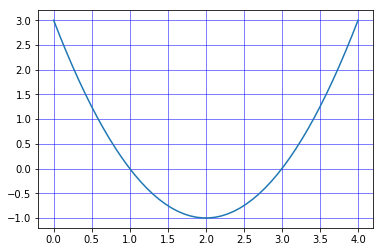

In [237]:
# 1
x = np.linspace(0.,4.,50)

y = (x**2)-(4*x)+ 3

plt.plot(x,y)
plt.grid(color='b', linestyle='-', linewidth=0.5)

In [214]:
# 2

#Gradeint = dy/dx = 2x-4
b =0
def dy_dx ( b):
    return (2*b)-4



Final Min X : 1.9943331602205565


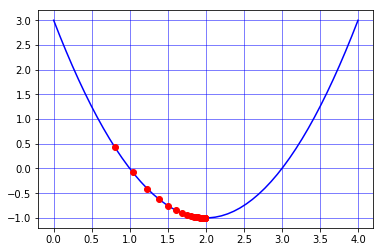

In [215]:
# 3 and 4
a=0.1
Xnew =0.5
N=25
xx =np.zeros(N)
yy =np.zeros(N)

for i in range(N):
    
    
    Xnew= Xnew - a*dy_dx(Xnew)
    
    xx[i]= Xnew
    
    yy[i] =(Xnew**2)-(4*Xnew)+ 3
    
    #print(Xnew)

    
print("Final Min X :",Xnew)
    
plt.plot(x, y, 'b',xx, yy ,'ro')
plt.grid(color='b', linestyle='-', linewidth=0.5)

### Exercise 2:

### 1. Plot the below bi-variate quadratic function on a 3D wireframe graph.
##  $$f(x,y) = x^2 + y^2 + 1$$
### for $-20.0 < x < 20.0$ and $-20.0<y<20.0$
### 2. Compute the partial derivatives wrt $x$ and $y$
### 3. Implement the gradient descent algorithm to find the value of $(x,y)$ that minimizes $f(x,y)$ 
### 4. Superimpose the gradient descent iterations on the graph in (1) 

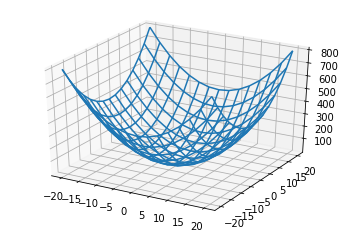

In [216]:
#fig=plt.figure()
#ax = fig.add_subplot(111,projection='3D')
#ax.plot_wireframe(X2s,Y2d,Z)
def f (X, Y):
    return X**2 +Y**2 +1
    

N=15
x=np.linspace(-20,20, N)
y=np.linspace(-20,20, N)

X,Y = np.meshgrid(x,y)
Z = f(X , Y)


fig=plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.plot_wireframe(X,Y,Z)




In [217]:
#Partial differntiantios on X and Y
def d_dx(xValue):
    return 2*xValue
def d_dy(yValue):
    return 2*yValue

In [218]:
#gradiant decent for partials
def minimumX(N,Xnew,a):
    inputx =np.ones(N)
    
    for i in range(N):

        Xnew= Xnew - a*d_dx(Xnew)

        inputx[i]= Xnew


    return inputx
    
    
def minimumY(N,Ynew,a):
    inputY =np.zeros(N)
   
    
    for i in range(N):

        Ynew= Ynew - a*d_dy(Ynew)

        inputY[i]= Xnew

        

    return inputY


    

<function matplotlib.pyplot.show(*args, **kw)>

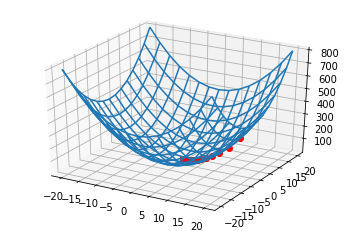

In [219]:
N= 100
Xstarting = 20
Ystarting = -20
alpha =0.1

xRange = minimumX(N,Xstarting, alpha)
yRange = minimumY(N,Ystarting, alpha)

minimumZ =f(xRange,yRange)
#print("Xrange :", xRange)
#print("Yrange :", yRange)
#print("Zmin   :", minimumZ)

#-------- Printing --------

N=15
x=np.linspace(-20,20, N)
y=np.linspace(-20,20, N)

X,Y = np.meshgrid(x,y)
Z = f(X , Y)


fig=plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.plot_wireframe(X,Y,Z)


ax.plot(xRange,yRange, minimumZ, 'ro')
plt.show

## A system measures the width and length in centimetres of two fish species, spnott and awrat.  The results are given in a csv (comma separated) text file. In this assignment you will develop a linear discriminant function and a logistic regressor that model the data. 



## We first load the dataset and print the first 10 entries.  The length is given in the 1st column, the width is given in the second column and the species is given in the third column.


In [220]:
# DO NOT MODIFY THIS CELL
with open('Fish_Dataset_2019.csv', 'r') as f:
#with open('Fish_Dataset_2019.csv', 'rbU') as f:
    reader = csv.reader(f)
    data_=[]
    for i,row in enumerate(reader):
        if i==0: 
            print(row)
        else:
            data_.append(row)
data = np.array(data_,dtype=float)
data[0:10]

['Length', ' Width', ' Class(0=spnott', ' 1=awrat)']


array([[30.49,  9.4 ,  0.  ],
       [17.87,  5.62,  1.  ],
       [22.52,  5.56,  0.  ],
       [27.95, 10.55,  1.  ],
       [36.75, 10.49,  0.  ],
       [32.27, 13.06,  1.  ],
       [26.06,  8.16,  0.  ],
       [19.94,  6.4 ,  1.  ],
       [25.89,  8.5 ,  0.  ],
       [29.96, 11.56,  1.  ]])

# Graded Questions below [max marks = 100]

## What is the size of the dataset and the class distribution?


In [221]:
dataSize= data.shape[0]
SpnottCount =0
AwratCount =0
SpnottLength = np.zeros(120)
SpnottWidth = np.zeros(120)
AwratLength= np.zeros(120)
AwratWidth= np.zeros(120)

for i in range(dataSize):
    if(data[i][2]==0):
        SpnottCount= SpnottCount +1
        SpnottLength[SpnottCount-1]= data[i][0]
        SpnottWidth[SpnottCount-1]= data[i][1]
    if(data[i][2]==1):
        AwratCount= AwratCount +1
        AwratLength[SpnottCount-1]= data[i][0]
        AwratWidth[SpnottCount-1]= data[i][1]

print('size of dataset  = ', dataSize)
print ('number of spnott = ', SpnottCount)
print ('number of awrat  = ', AwratCount)
#print (SpnottCount + AwratCount)

size of dataset  =  240
number of spnott =  120
number of awrat  =  120


## Plot a scatter-plot that depicts spnott as a blue dot and awrat as a red dot. As you will see we have to use both input variables, since any variable on its own does not provide enough discrimination power. [5 marks]


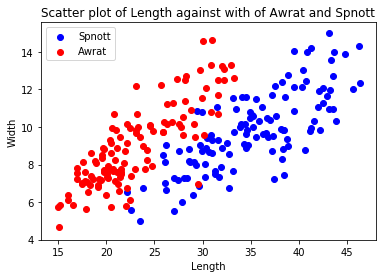

In [222]:
spnott =plt.scatter(SpnottLength,SpnottWidth, marker='o', color = 'b' )
awrat  =plt.scatter(AwratLength,AwratWidth,  marker='o', color = 'r' )
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Scatter plot of Length against with of Awrat and Spnott')
plt.legend((spnott, awrat), ('Spnott','Awrat'))

plt.show()


## Comment on whether the two input variables are correlated. [5 marks]


In [223]:
pearsonCC , TwoTailed = stats.pearsonr(data[:,0], data[:,1])
print("pearson cc", pearsonCC)
print("Two tailed", TwoTailed)

if(TwoTailed < 0.05 and pearsonCC >0.5):
    print("***Since p value is less than 0.05, and corelation coefficannt is greater than 0.5, we can say they are correlated***")

pearson cc 0.6517718028148533
Two tailed 2.0632264224855078e-30
***Since p value is less than 0.05, and corelation coefficannt is greater than 0.5, we can say they are correlated***


## We will now split the dataset into two parts. One part is called the training set and the other part is called the test set.


In [224]:
# DO NOT MODIFY THIS CELL
train_split = int(len(data)*0.7)
print ('Split dataset at ', train_split)
d_train= np.array(data[0:train_split,:])
d_test = np.array(data[train_split:,:])
print ('Shape of train = ',np.shape(d_train))
print ('Shape of test = ',np.shape(d_test))

Split dataset at  168
Shape of train =  (168, 3)
Shape of test =  (72, 3)


## Plot a scatter-plot for the training set and on the same plot add a green line that separates the two classes.  Manually, vary the gradient and intercept coefficient to minimize the overall classification error. [10 marks]


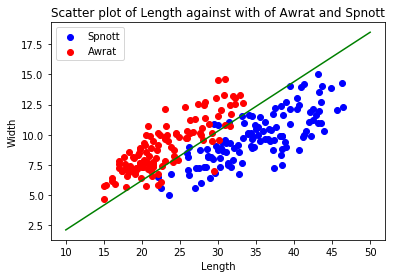

In [225]:

# eqn of line : y = mx + c
c= -2
m =0.41
x =np.array([10,50])
y = m*x +c

#plotting scatter plot 
spnott =plt.scatter(SpnottLength,SpnottWidth, marker='o', color = 'b' )
awrat  =plt.scatter(AwratLength,AwratWidth,  marker='o', color = 'r' )
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Scatter plot of Length against with of Awrat and Spnott')
plt.legend((spnott, awrat), ('Spnott','Awrat'))

plt.plot(x,y, 'g')

plt.show()




## Develop a vectorised function to predict the class given the weights for a linear descision boundary and the input features for a dataset. [10 marks]

In [226]:

def predict_y(W,D):
    z = np.zeros(len(D))
    
    #z = W[0] + D[:,0]*W[1] + D[:,1]*W[2]

    z = 1 + D[:,0]*W[0] + D[:,1]*W[1]
    
    
    P1 = 1/ (1+np.exp(-z))
    
    #rounding
    result = (np.where(P1>0.5,1,0))
    
    return result
    


## Develop a function to calculate the error, given the predicted values and the dataset (complete with gold labels) [10 marks]Â¶

In [227]:
def get_error(D,Y):
    #D = data set, Y = predicted values
    countWrong = 0;
    Error= 0
    for i in range(len(D)):
        if(D[i][2]==Y[i]):
            countWrong = countWrong +1
    Error = countWrong/ len(D)
    return Error
    


## Develop a function to calculate the classification accuracy, given the predicted values and the data set [5 marks]

In [228]:
def get_accuracy(D,Y):
    acuracy = 1- get_error(D,Y)
    return acuracy


## Use a Monte-Carlo search method (random search) and the functions you have developed to find the weight vector that minimizes the overall classification error. [10 marks]

In [229]:
#Range of random numbers was set based on the maunally set line 

iterations = 10000
maxA = 3
minA = -0.5

maxB = -1
minB =-5


error =1
bestWeights=[0,0]

for i in range(iterations):

    a = np.random.uniform(low=minA, high=maxA)
    
    b = np.random.uniform(low=minB, high=maxB)
    ws = [a ,b]
    pred =predict_y(ws,d_train)
   

    if(error > get_error(d_train,pred)):
        error = get_error(d_train,pred)
        bestWeights = ws



print("------ Final -----")    
print (error)
print("ac :" ,(1-error))
print(bestWeights)


------ Final -----
0.08928571428571429
ac : 0.9107142857142857
[1.2248012203922531, -3.5674258338248808]


## What is the overall classification rate and the class classification rate on the test set? [5marks]


In [230]:
def FishSplitter(D):
    Spnott =[]
    Awrat = []
    for i in D:
        if(i[2]==0):
            Spnott.append(i)
        if(i[2]==1):
            Awrat.append(i)

    return np.array(Spnott),np.array(Awrat) 
    


In [231]:
def classificationAccuracy(D):

    Spnott, Awrat = FishSplitter(D)
    SpnottPredicted = predict_y(bestWeights, Spnott)
    AwratPredicted = predict_y(bestWeights, Awrat)
    
    SpnottAc = get_accuracy(Spnott, SpnottPredicted)
    AwratAc = get_accuracy(Awrat, AwratPredicted)
    
    return SpnottAc, AwratAc

    

In [232]:
## on all data
AllSpnottAc ,AllAwratAc = classificationAccuracy(data)
print("--- On All data set ---")
print("Accuracy total: " ,get_accuracy(data, predict_y(bestWeights, data)))
print("Accuracy Spnott: ", AllSpnottAc)
print("Accuracy Awrat: ", AllAwratAc)

## on test

testSpnottAc ,testAwratAc = classificationAccuracy(d_test)
print("--- On TEST data set ---")
print("Accuracy total: ", get_accuracy(d_test, predict_y(bestWeights, d_test)))
print("Accuracy Spnott: ", testSpnottAc)
print("Accuracy Awrat: ", testAwratAc)

--- On All data set ---
Accuracy total:  0.875
Accuracy Spnott:  0.975
Accuracy Awrat:  0.775
--- On TEST data set ---
Accuracy total:  0.7916666666666666
Accuracy Spnott:  0.9722222222222222
Accuracy Awrat:  0.6111111111111112


## Write down the cross-entropy cost function and find the partial derivatives wrt weights. (Use MathJax) [10 marks]

## Cross entropy cost function

\begin{eqnarray} 
  C = -\frac{1}{n} \sum_x \left[y \ln a + (1-y ) \ln (1-a) \right],
\end{eqnarray}



# where : 
$$a = \sigma(z) $$ and z is the sumation of weighted inputs

\begin{eqnarray}
  \frac{\partial C}{\partial w_j} & = & \frac{1}{n}
  \sum_x \frac{\sigma'(z) x_j}{\sigma(z) (1-\sigma(z))}
  (\sigma(z)-y).
\end{eqnarray}

## Code the gradient descent algorithm to minimize the cross-entropy cost function in a logistic regression model. Plot the error versus iterations and compute the train and test accuracy. [25 marks]

In [233]:
...

Ellipsis

## Is there any significant difference between the results obtained with the random search and the results obtained using gradient descent? [5 marks]

In [234]:
...

Ellipsis